In [2]:
import pandas as pd 
import seaborn as sns

items = []

def load_item(line):
    numbers = line.split(',')
    item = {}
    for n in numbers:
        item[n] = item.get(n,0) + 1
    return item


with open("../../imdb/imdb_tokenized.csv",'r') as f:
    for line in f:
        items.append(load_item(line))

In [4]:
total_flat = {}
for item in items:
    for key,value in item.items():
        total_flat[key] = total_flat.get(key,0)+1

In [13]:
sorted_items = sorted(total_flat.items(), key = lambda x: x[1])

In [18]:
apparitions_set = {}
for key, count in sorted_items:
    apparitions_set[count] = apparitions_set.get(count, 0) + 1

apparitions_set = sorted(apparitions_set.items(), key = lambda x: x[1])

In [35]:
for i, it in enumerate(list(reversed(apparitions_set))):
    print((i,it))


(0, (1, 96328))
(1, (2, 19789))
(2, (3, 8983))
(3, (5, 5417))
(4, (6, 4277))
(5, (7, 3313))
(6, (8, 2689))
(7, (4, 2599))
(8, (9, 2150))
(9, (10, 1895))
(10, (11, 1538))
(11, (12, 1357))
(12, (13, 1159))
(13, (14, 1049))
(14, (15, 912))
(15, (16, 836))
(16, (17, 799))
(17, (18, 710))
(18, (19, 670))
(19, (20, 656))
(20, (21, 538))
(21, (22, 535))
(22, (23, 487))
(23, (24, 465))
(24, (25, 429))
(25, (27, 414))
(26, (26, 398))
(27, (28, 360))
(28, (30, 333))
(29, (29, 329))
(30, (31, 301))
(31, (34, 285))
(32, (33, 282))
(33, (32, 281))
(34, (35, 266))
(35, (36, 251))
(36, (37, 247))
(37, (38, 233))
(38, (44, 219))
(39, (39, 215))
(40, (40, 210))
(41, (42, 204))
(42, (41, 182))
(43, (43, 180))
(44, (46, 171))
(45, (48, 161))
(46, (45, 159))
(47, (47, 157))
(48, (49, 153))
(49, (50, 151))
(50, (51, 143))
(51, (53, 142))
(52, (56, 141))
(53, (52, 133))
(54, (60, 125))
(55, (55, 125))
(56, (61, 119))
(57, (58, 117))
(58, (54, 114))
(59, (59, 113))
(60, (57, 113))
(61, (62, 109))
(62, (63, 1

(1709, (414, 1))
(1710, (405, 1))


In [24]:
sum([y for x,y in apparitions_set])

176105

In [26]:
[x for x in dir(sns) if 'plot' in x]

['barplot',
 'boxenplot',
 'boxplot',
 'catplot',
 'countplot',
 'distplot',
 'dogplot',
 'factorplot',
 'jointplot',
 'kdeplot',
 'lineplot',
 'lmplot',
 'lvplot',
 'miscplot',
 'pairplot',
 'palplot',
 'plotting_context',
 'pointplot',
 'regplot',
 'relplot',
 'residplot',
 'rugplot',
 'scatterplot',
 'stripplot',
 'swarmplot',
 'tsplot',
 'violinplot']

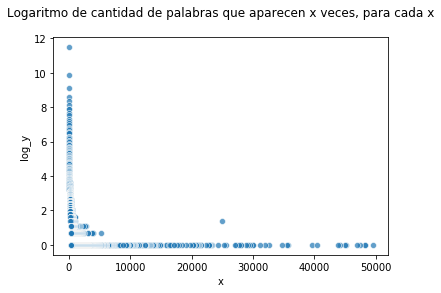

In [63]:
import numpy as np
%matplotlib inline
plotty = list(reversed(apparitions_set))

log_y = np.log([y for _,y in plotty])
plot_dict = {'x': [ k for k,_ in plotty],
            'y': [v for _,v in plotty],
             'log_y':log_y
            }
df = pd.DataFrame()
df['x'] = plot_dict['x']
df['y'] = plot_dict['y']
df['log_y'] = plot_dict['log_y']

scatter_plot = sns.scatterplot(data=df, x='x',y='log_y', alpha=0.7).set_title('Logaritmo de cantidad de palabras que aparecen x veces, para cada x\n')
fig = scatter_plot.get_figure()
fig.savefig('log_apariciones_vs_palabras_que') 